Import Both input and response file

In [1]:
#!pip install pandas
import pandas as pd
pd.set_option('display.max_rows', None)
df_input = pd.read_csv('example_explanatory_variables.csv')
df_output = pd.read_csv('example_response_variable.csv')
X = df_input
y= df_output['V1']
#print(X.Orientation)

Replace elements

In [2]:
X['Orientation'] = X.Orientation.astype(str)
Ori = pd.get_dummies(X.Orientation)
X = X.join(Ori)
X.dtypes 
X = X.drop('Orientation' ,axis = 1)

Bk = pd.get_dummies(X.Backbone)
X = X.join(Bk)
X = X.drop('Backbone', axis = 1 )

OD = pd.get_dummies(X.OligoDensity)
X = X.join(OD)
X = X.drop('OligoDensity', axis = 1)

AT = pd.get_dummies(X.Attachment)
X = X.join(AT)
X = X.drop('Attachment', axis = 1)

X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

print(X.head(10))

   Size Lipid  PeptideDensity  OligoConc  3  5  PO  PS  High  Low  VHigh  \
0    50     1            0.00          1  1  0   1   0     0    1      0   
1    80     1            0.00          1  1  0   1   0     0    1      0   
2    50     1            0.05          1  1  0   1   0     0    1      0   
3    80     1            0.05          1  1  0   1   0     0    1      0   
4    50     1            0.50          1  1  0   1   0     0    1      0   
5    80     1            0.50          1  1  0   1   0     0    1      0   
6    50   0.8            0.00          1  1  0   1   0     0    1      0   
7    80   0.8            0.00          1  1  0   1   0     0    1      0   
8    50   0.8            0.05          1  1  0   1   0     0    1      0   
9    80   0.8            0.05          1  1  0   1   0     0    1      0   

   Chol  DOPE  
0     1     0  
1     1     0  
2     1     0  
3     1     0  
4     1     0  
5     1     0  
6     1     0  
7     1     0  
8     1     0  
9  

In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [4]:
print(regr.coef_)

[  0.14379197   9.55878646 -21.39492038   0.45993136 -25.52337485
  25.52337485 -26.52593735  26.52593735   1.48264132   8.7866066
 -10.26924792  72.36682682 -72.36682682]


In [5]:
Pred = regr.predict(X.head(500))

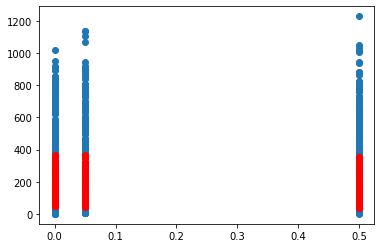

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.PeptideDensity,y)
plt.scatter(X.PeptideDensity.head(500),Pred,c = "red")

K-fold cross-validation to get Q2 value (k-folds = 5)

In [7]:
X=X[['PO','PS','Chol','DOPE']]
print(X.head(10))

   PO  PS  Chol  DOPE
0   1   0     1     0
1   1   0     1     0
2   1   0     1     0
3   1   0     1     0
4   1   0     1     0
5   1   0     1     0
6   1   0     1     0
7   1   0     1     0
8   1   0     1     0
9   1   0     1     0


In [8]:
import warnings
import math
import numpy
def getQ2(test_pred, test_res, rand_res): 

# this function calculates Q2 values

  # set up squared total error and squared residual error
    SS_tot = 0
    SS_res = 0
  
    # continuous variable
      # accumulate errors
    SS_tot = SS_tot + sum(numpy.square(numpy.subtract(test_res,rand_res)))
    SS_res = SS_res + sum(numpy.square(numpy.subtract(test_res,test_pred)))
    
  # do final Q2 calculation
    Q2 = 1 - SS_res / SS_tot
    #Q2 = 1 - (Sum(real-predict)/Sum(real-predict_group_mean))
  # something went wrong and there was NA (rare)
    if math.isnan(Q2) or pd.isna(Q2):
        Q2 = 0
        warn("Q2 in Q2.R created nan")
    return(Q2)

In [9]:
from sklearn.model_selection import KFold
import statistics as statss
kf = KFold(n_splits=5)
kf.get_n_splits(X)
regrt = linear_model.LinearRegression()
CVX = X.copy()
CVy = y.copy()
Test_pred = [] #predicted values
Test_res = []  #original values
rand_res = []  #training set mean values
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    trainX , trainY = CVX.iloc[train_index] , CVy.iloc[train_index]
    testX , testY =  CVX.iloc[test_index] , CVy.iloc[test_index]
    #print(trainX)
    regrt.fit(trainX, trainY)
    Pred_test = regrt.predict(testX)
    Mean_trained_y=statss.mean(trainY)
    for x in range(len(Pred_test)):
        rand_res.append(Mean_trained_y)
    Test_pred.extend(Pred_test)
    Test_res.extend(testY)

print(len(rand_res)==len(Test_pred))
Q2 = getQ2(Test_pred,Test_res,rand_res)
print(Q2)

True
-0.015031362068277376
